In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
training_df = pd.read_csv('data/training_set.csv')
training_metadata_df = pd.read_csv('data/training_set_metadata.csv')
test_metadata_df = pd.read_csv('data/plasticc_test_metadata_unblinded.csv', nrows=10000)

In [100]:
print(len(test_metadata_df))

10000


In [101]:
test_metadata_df[:10]

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,13,34.4531,-5.2295,1,0.305,0.319,0.054,41.112,0.019,0,...,0.0,0.000,60499.461,124,0.0,0.0,0.0,0.0,0.0,0.0
1,14,33.3984,-4.3311,1,-9.000,0.632,0.018,42.877,0.018,0,...,0.0,0.000,59792.121,120,0.0,0.0,0.0,0.0,0.0,0.0
2,17,348.5294,-61.7554,1,-9.000,0.830,0.060,43.600,0.016,0,...,0.0,0.000,60543.566,85,0.0,0.0,0.0,0.0,0.0,0.0
3,23,34.8047,-5.8292,1,-9.000,0.653,0.148,42.964,0.023,0,...,0.0,0.000,60137.480,97,0.0,0.0,0.0,0.0,0.0,0.0
4,34,351.3214,-64.1987,1,0.456,0.462,0.012,42.054,0.023,0,...,0.0,0.000,60245.078,68,0.0,0.0,0.0,0.0,0.0,0.0
5,35,35.3320,-5.9792,1,-9.000,0.839,0.038,43.629,0.022,0,...,0.0,0.000,60557.289,61,0.0,0.0,0.0,0.0,0.0,0.0
6,43,0.5745,-45.9811,1,-9.000,0.667,0.055,43.019,0.006,0,...,3.1,0.132,59913.246,130,0.0,0.0,0.0,0.0,0.0,0.0
7,50,0.5745,-45.9811,1,-9.000,1.466,0.053,45.128,0.006,0,...,0.0,0.000,59891.719,130,0.0,0.0,0.0,0.0,0.0,0.0
8,60,346.5625,-63.4483,1,-9.000,0.946,0.012,43.952,0.021,0,...,0.0,0.000,60574.031,58,0.0,0.0,0.0,0.0,0.0,0.0
9,69,349.1606,-64.7609,1,-9.000,1.043,0.109,44.214,0.020,0,...,0.0,0.000,60536.945,50,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
obj_ids = np.unique(training_df.object_id)

/Users/neilbassett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


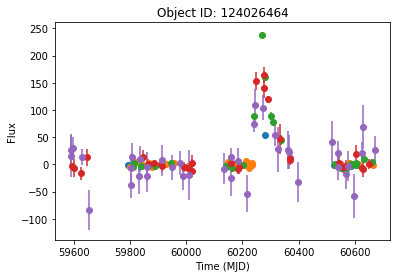

In [17]:
obj_id = np.random.choice(obj_ids)
obj = training_df[training_df.object_id == obj_id]
for passband in np.arange(1, 6):
    plt.errorbar(obj[training_df.passband == passband].mjd, obj[training_df.passband == passband].flux,\
                 yerr=obj[training_df.passband == passband].flux_err, fmt='o')
plt.xlabel('Time (MJD)')
plt.ylabel('Flux')
plt.title('Object ID: %i' % obj_id)
plt.show()

In [94]:
targets = np.unique(training_metadata_df.target)

In [102]:
N_train = []
N_test = []
for i in np.arange(len(targets)):
    N_train += [len(training_metadata_df.loc[training_metadata_df.target == targets[i]])]
    N_test += [len(test_metadata_df.loc[test_metadata_df.true_target == targets[i]])]
w_train = N_train/np.sum(N_train)
w_test = N_train/np.sum(N_test)
print(targets)
print(w_test)

[ 6 15 16 42 52 53 62 64 65 67 88 90 92 95]
[0.01520338 0.0498389  0.09303262 0.12011679 0.01842529 0.00302054
 0.04873137 0.01026983 0.09877165 0.02094241 0.03725332 0.23288361
 0.02406363 0.01761981]


In [103]:
def LogLoss(y_true, y_pred, test=False):
    if test:
        w = w_test
    else:
        w = w_train
    y_clip = np.clip(y_pred, 1e-15, 1-1e-15)
    loss = -(np.mean(np.mean(y_true*np.log(y_clip), axis=0)/w))
    return loss

# Random selection baseline

In [97]:
test_metadata_df[:5]

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,13,34.4531,-5.2295,1,0.305,0.319,0.054,41.112,0.019,0,...,0.0,0.0,60499.461,124,0.0,0.0,0.0,0.0,0.0,0.0
1,14,33.3984,-4.3311,1,-9.000,0.632,0.018,42.877,0.018,0,...,0.0,0.0,59792.121,120,0.0,0.0,0.0,0.0,0.0,0.0
2,17,348.5294,-61.7554,1,-9.000,0.830,0.060,43.600,0.016,0,...,0.0,0.0,60543.566,85,0.0,0.0,0.0,0.0,0.0,0.0
3,23,34.8047,-5.8292,1,-9.000,0.653,0.148,42.964,0.023,0,...,0.0,0.0,60137.480,97,0.0,0.0,0.0,0.0,0.0,0.0
4,34,351.3214,-64.1987,1,0.456,0.462,0.012,42.054,0.023,0,...,0.0,0.0,60245.078,68,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
rand_pred = np.random.choice(targets, size=len(test_metadata_df))
y_pred_rand = np.zeros((len(test_metadata_df), len(targets)))
y_true_test = np.zeros((len(test_metadata_df), len(targets)))
for i in np.arange(len(y_pred)):
    y_pred_rand[i, np.where(targets == pred[i])] = 1
    y_true_test[i, np.where(targets == test_metadata_df.true_target.values[i])] = 1
loss_rand = LogLoss(y_true_test, y_pred_rand, test=True)
acc_rand = np.sum(test_metadata_df['true_target'] == rand_pred)/len(rand_pred)
print('*** Random Prediction Baseline ***')
print('Log Loss = %.3f' % loss_rand)
print('Accuracy = %.4f' % acc_rand)

*** Random Prediction Baseline ***
Log Loss = 21.955
Accuracy = 0.0706


# Galactic/Extragalactic baseline

In [105]:
galactic_cut = test_metadata_df['hostgal_photoz'] == 0
galactic_objs = test_metadata_df[galactic_cut]
extragalactic_objs = test_metadata_df[~galactic_cut]

In [107]:
for target in targets:
    galactic_frac = np.sum(galactic_objs['true_target'] == target)/np.sum(test_metadata_df['true_target'] == target)
    extragalactic_frac = np.sum(extragalactic_objs['true_target'] == target)/np.sum(test_metadata_df['true_target'] == target)
    print('class = %s' % target)
    print('Galactic fraction = %.4f' % galactic_frac)
    print('Extragalactic fraction = %.4f\n' % extragalactic_frac)

class = 6
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 15
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 16
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 42
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 52
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 53
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 62
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 64
Galactic fraction = nan
Extragalactic fraction = nan

class = 65
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 67
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 88
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 90
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 92
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 95
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000



/Users/neilbassett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/neilbassett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
galactic_targets = np.array([6, 16, 53, 65, 92])
extragalactic_targets = np.array([15, 42, 52, 62, 64, 67, 88, 90, 95])

In [130]:
pred_gal = []
y_pred_gal = np.zeros((len(test_metadata_df), len(targets)))
for i in np.arange(len(test_metadata_df)):
    if test_metadata_df.hostgal_photoz.values[i] == 0:
        pred_gal += [np.random.choice(galactic_targets)]
    else:
        pred_gal += [np.random.choice(extragalactic_targets)]
    y_pred_gal[i, np.where(targets == pred_gal[i])] = 1
loss_gal = LogLoss(y_true_test, y_pred_gal, test=True)
acc_gal = np.sum(test_metadata_df['true_target'] == pred_gal)/len(pred_gal)
print('*** Galactic/Extragalactic Baseline ***')
print('Log Loss = %.3f' % loss_gal)
print('Accuracy = %.4f' % acc_gal)

*** Galactic/Extragalactic Baseline ***
Log Loss = 21.101
Accuracy = 0.1106
